In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
#reading the dataset and checking the first 5 values for each feautre
data=pd.read_csv('/content/CC GENERAL.csv')
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#Checking features datatypes and records count for each feature
#All the features are considered numeric features except the CUST_ID it has object datatype.
#Other features either be (float64 or int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#Counting null values for each feature
#CREDIT_LIMIT has only one null value so it can be neglected (Dropped from the data)
#MINIMUM_PAYMENTS has 313 null values comparing to the number of records (313 to 8950) we have 2 choicese 
#1- drop the null records 
#2- imputate the null values with (mean-min-median-max-zero) 
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Get more insights about the data
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#most frequent value
data["MINIMUM_PAYMENTS"].mode()

0    299.351881
dtype: float64

In [ ]:
#mean value of the column
data["MINIMUM_PAYMENTS"].mean()

864.2065423050828

In [ ]:
#median value of the column
data["MINIMUM_PAYMENTS"].median()

312.343947

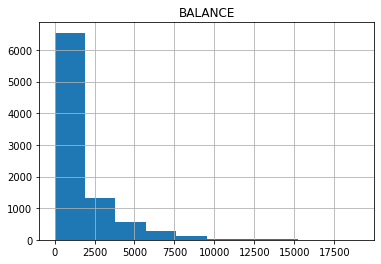

2.393386042571806


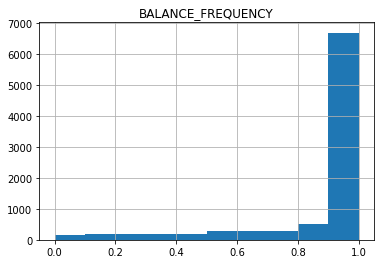

-2.0232655185149078


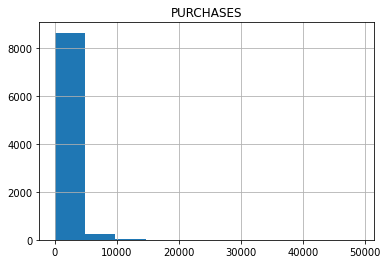

8.144269064554651


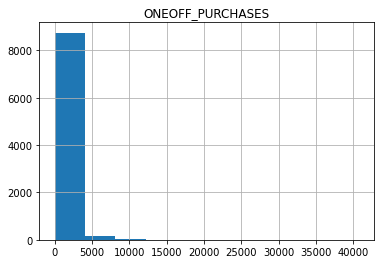

10.045082884700278


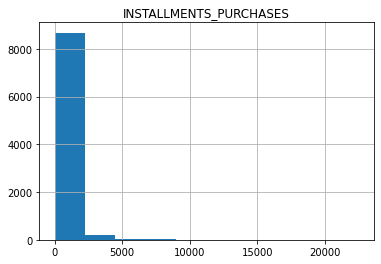

7.299119908745641


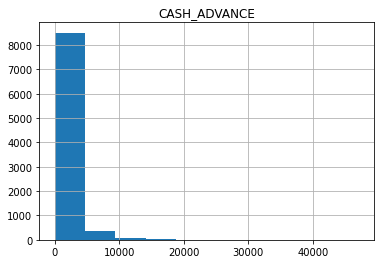

5.166609074074723


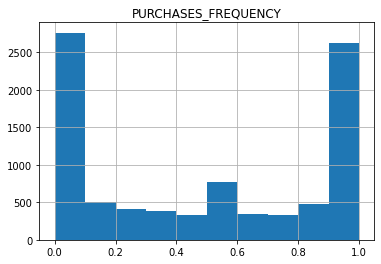

0.06016423585803591


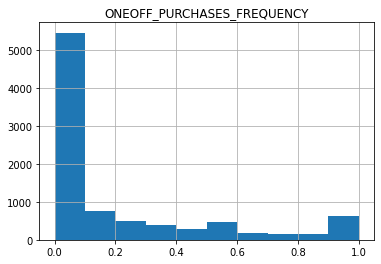

1.5356127835248519


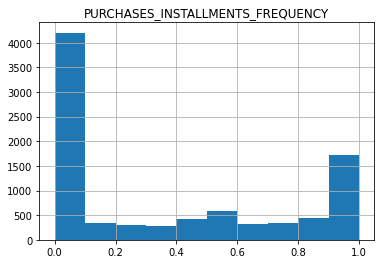

0.5092011649999882


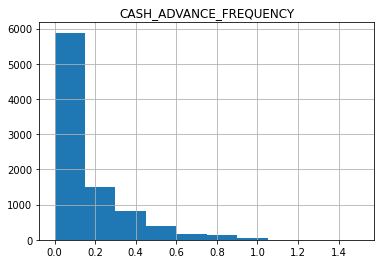

1.828686266477852


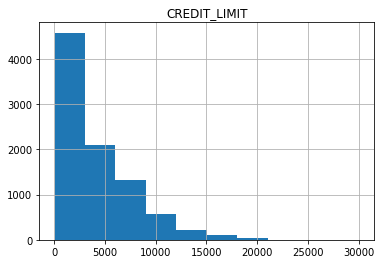

1.5224640052886198


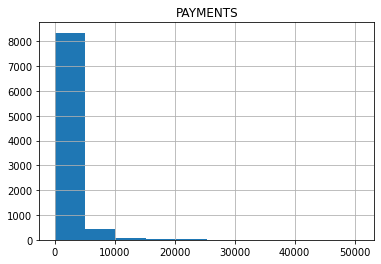

5.907619794397562


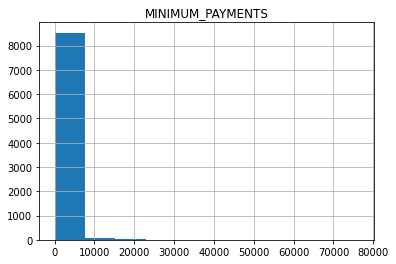

13.622796994677456


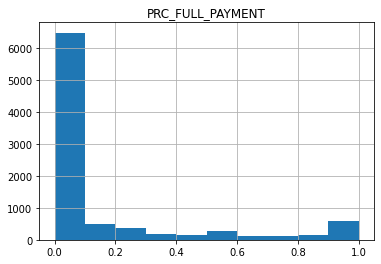

1.942819940971858


In [ ]:
#plotting features to check features skewness
#most of the features have skewness either (right - left) skewness
for i in data.select_dtypes('float64'):
  plt.title(i)
  data[i].hist()
  plt.show()
  print(str(data[i].skew()))

In [ ]:
#filling the null values for the 'MINIMUM_PAYMENTS' with zeros and dropping null from 'CREDIT_LIMIT'
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(value=data['MINIMUM_PAYMENTS'].median())
data["CREDIT_LIMIT"]=data["CREDIT_LIMIT"].fillna(value=0)

In [ ]:
#checking for null values
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Feature Transformation

In [ ]:
#scaling features with standard scaler and dropping "CUST_ID" column to solve data skewness
#drop the "CUST_ID" column as it's not needed
scaler = StandardScaler()
df = scaler.fit_transform(data.drop(columns=["CUST_ID"]))

# K-MEANS

In [ ]:
#importing models(kmeans-DBSCAN)
#by trying diferrent values for k parameter (2,3,4,5,6,7,8) the best value for k is between (7-9) , 9 has a higher score
#k=2 score was 0.2094978782793793
#k=3 score was 0.2506374367781434
#k=4 score was 0.19798067910405442
#k=5 score was 0.1930623590093102
#k=6 score was 0.202730919690241
#k=7 score was 0.215238198948182
#k=8 score was 0.22200808946401163
#k=9 score was 0.22624596453634047
#k=10 score was 0.2237128477386891
from sklearn.cluster import KMeans, DBSCAN
model = KMeans(8)
model.fit(df)
y=model.fit_predict(df)
print(np.unique(y,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([1123, 2009,  874,  357,   24,  623, 2756, 1184]))


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df,y)

0.21489463507567463

# DBSCAN TUNE

In [ ]:
#measuring distance to get best eps for DBSCAN
from sklearn.neighbors import NearestNeighbors
mins = 5
nn = NearestNeighbors(n_neighbors=mins + 1)
nn.fit(df)
distances, neighbors = nn.kneighbors(df)
distances

array([[0.        , 0.38471131, 0.46081901, 0.49349376, 0.51264381,
        0.57653691],
       [0.        , 1.25817176, 1.3419975 , 1.34937331, 1.37110536,
        1.42000132],
       [0.        , 0.40460086, 0.66741497, 0.70804398, 0.72598009,
        0.76234238],
       ...,
       [0.        , 0.9200107 , 0.92947886, 0.93359423, 0.93462867,
        0.93846063],
       [0.        , 1.11851592, 1.13335206, 1.18871329, 1.21811762,
        1.26674504],
       [0.        , 1.48408906, 1.48652552, 1.57291666, 1.72152367,
        1.82375794]])

In [ ]:
distances = np.sort(distances[:, mins], axis = 0)

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: elbow.png


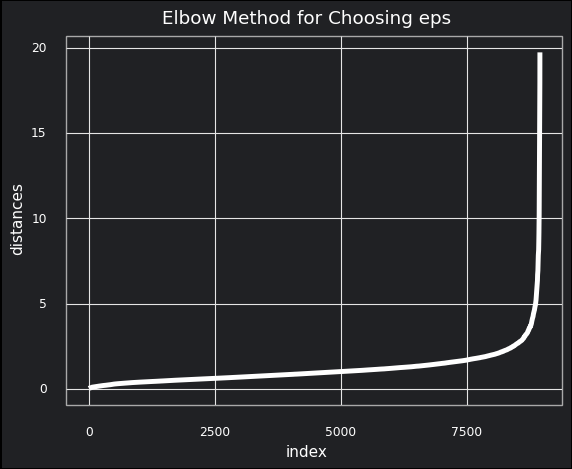

<ggplot: (8740379963055)>

In [ ]:
from plotnine import *
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [ ]:
#DBSCAN wasn't a good choice with this dataset as it clusters the data into 2 clusters (noise - cluster 1) only for different values for (eps-min_samples)
db = DBSCAN(eps = 5, min_samples = 35).fit(df)
print(silhouette_score(df,db.labels_ ))
print(np.unique(db.labels_,return_counts=True))

0.7324277329696498
(array([-1,  0]), array([  80, 8870]))


# hierarical model

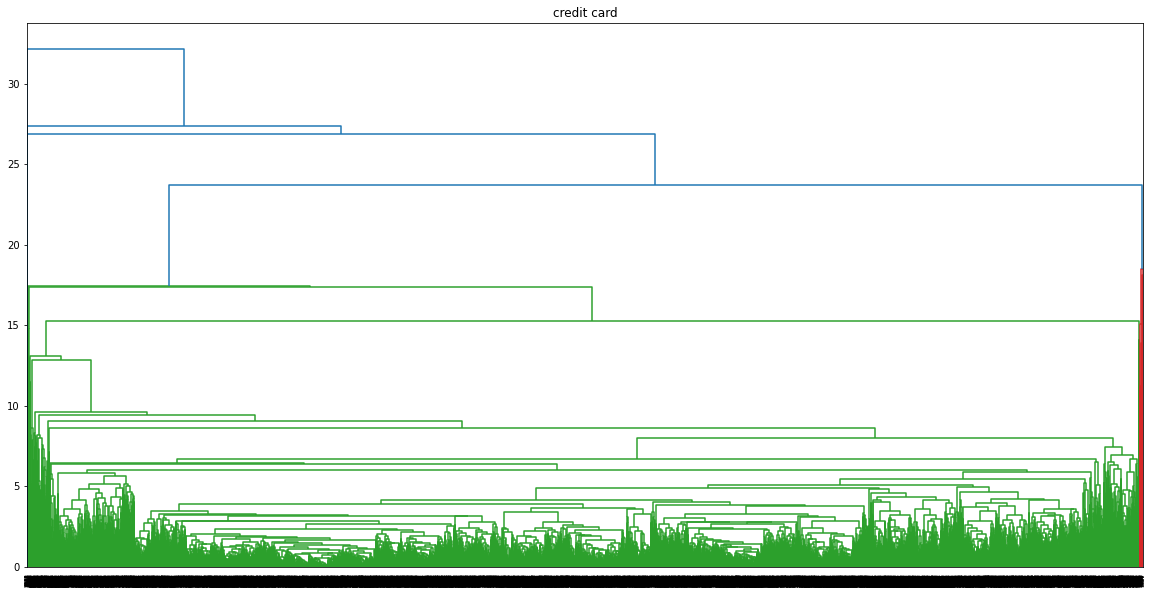

In [ ]:
#dendogram for hierarical model
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))
plt.title("credit card")
dend = shc.dendrogram(shc.linkage(y= df , method='average',metric='euclidean'),orientation='top')

In [ ]:
#trying different values for k with hierarical model results are :
#k=2 score was 0.19210304540689024
#k=3 score was 0.16744820520935655
#k=4 score was 0.15978401178101584
#k=5 score was 0.1747135251860989
#k=6 score was 0.1587623658196858
#k=7 score was 0.16121852331400802
#k=8 score was 0.16010360227231066
#k=9 score was 0.16587033269647786
# And the best value for k is between (5-7) , 5 has a higher score
model = AgglomerativeClustering(7)
y=model.fit_predict(df)
print(silhouette_score(df,y))
print(np.unique(y,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([2907, 2581, 1194,  277,  750, 1218,   23]))


#  Gaussian Mixture

In [ ]:
#trying different values for k with  GaussianMixture  model results are :
#k=2 score was 0.2001024351294578
#k=3 score was 0.11432815015134863
#k=4 score was 0.06848585207510856
#k=5 score was 0.09745090263654205
#k=6 score was 0.05376616072868256
#k=7 score was 0.016130413748624742
#k=8 score was 0.02206306357139205
#k=9 score was 0.02008722802028615
#So the best value for k is 3 (has the highest score)
gm = GaussianMixture(3)
GM=gm.fit(df)
print(silhouette_score(df, gm.predict(df)))
print(np.unique(gm.predict(df),return_counts=True))

0.11268970037069603
(array([0, 1, 2]), array([3962, 2172, 2816]))


In [ ]:
# PCA 
for i in range(1,18):
  pca = PCA(i)
  componants = pca.fit_transform(df)
  y=model.fit_predict(componants)
  print(i," : ",silhouette_score(componants,y))

1  :  0.5680146879416831
2  :  0.4118778534946231
3  :  0.3783180719279812
4  :  0.3654273047176231
5  :  0.21539506389969418
6  :  0.21984687258797744
7  :  0.2398717249558691
8  :  0.23205636605412872
9  :  0.20089675755729228
10  :  0.2511512799499294
11  :  0.20120901003404118
12  :  0.14977923540577648
13  :  0.20028173810602515
14  :  0.17984063330717795
15  :  0.1828872239628237
16  :  0.16744835133089556
17  :  0.1674482052093566


In [ ]:
print(componants[4])

[-1.60001385e+00 -6.83671282e-01  3.48066327e-01  1.01358009e+00
 -4.53494374e-01  7.77696530e-02  6.97987282e-01  2.46141077e-01
  5.78026742e-01 -1.22188127e-01 -4.55234321e-01 -1.08804522e-01
 -3.74152183e-02 -4.09961938e-02  2.90919525e-01 -7.05940098e-02
 -8.10885855e-05]


In [ ]:
#choosing pca with a suitable score which is 4
pca = PCA(4)
#fitting data with hierarical model after pca
model = AgglomerativeClustering(7)
componant = pca.fit_transform(df)
y=model.fit_predict(componant)
print(silhouette_score(componant,y))
print(np.unique(y,return_counts=True))

0.2701321013735937
(array([0, 1, 2, 3, 4, 5, 6]), array([3418, 2670,  686, 1195,   26,  131,  824]))


In [ ]:
#fitting data with Gaussian Mixture  model after pca
gm1 = GaussianMixture(3)
DB=gm1.fit(componants)
print(silhouette_score(componants, gm1.predict(componants)))
print(np.unique(gm1.predict(componants),return_counts=True))

0.17831546851123145
(array([0, 1, 2]), array([2274, 4083, 2593]))


In [ ]:
#fitting data with DBSCAN  model after pca
#still DBSCAN is a bad model for this dataset as it clusters the data into 2 clusters (noise - cluster 1)
db = DBSCAN(eps = 4, min_samples = 35).fit(componants)
print(silhouette_score(componants,db.labels_ ))
print(np.unique(db.labels_,return_counts=True))

0.791018466421333
(array([-1,  0]), array([  43, 8907]))


In [ ]:
#fitting data with Kmeans  model after pca
model = KMeans(9)
DB=model.fit(componants)
y=model.fit_predict(componants)
print(silhouette_score(componants,y))
print(np.unique(y,return_counts=True))

0.27560033157956587
(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([2116, 2399, 1335,  277,  977,  466, 1136,   24,  220]))


**For this dataset after performing PCA the best 2 models are kmeans and hierarical model as they have the highest score and well defined clusters.**